##### 面试高危问题：Sigmoid函数的公式和性质
Sigmoid函数是一个S型的函数，当自变量z趋近正无穷时，因变量g(z)趋近于1，而当z趋近负无穷时，g(z)趋近于0，它能够将任何实数映射到(0,1)区间，使其可用于将任意值函数转换为更适合二分类的函数。因为这个性质，Sigmoid函数也被当作是归一化的一种方法，与我们之前学过的MinMaxSclaer同理，是属于数据预处理中的“缩放”功能，可以将数据压缩到[0,1]之内。区别在于，MinMaxScaler归一化之后，是可以取到0和1的（最大值归一化后就是1，最小值归一化后就是0），但Sigmoid函数只是无限趋近于0和1

##### 为什么需要逻辑回归
线性回归对数据的要求很严格，比如标签必须满足正态分布，特征之间的多重共线性需要消除等等，而现实中很多真实情景的数据无法满足这些要求，因此线性回归在很多现实情境的应用效果有限。逻辑回归是由线性回归变化而来，因此它对数据也有一些要求，而我们之前已经学过了强大的分类模型决策树和随机森林，它们的分类效力很强，并且不需要对数据做任何预处理。

1. 逻辑回归对线性关系的拟合效果好到丧心病狂，特征与标签之间的线性关系极强的数据，比如金融领域中的信用卡欺诈，评分卡制作，电商中的营销预测等等相关的数据，都是逻辑回归的强项。虽然现在有了梯度提升树GDBT，比逻辑回归效果更好，也被许多数据咨询公司启用，但逻辑回归在金融领域，尤其是银行业中的统治地位依然不可动摇（相对的，逻辑回归在非线性数据的效果很多时候比瞎猜还不如，所以如果你已经知道数据之间的联系是非线性的，千万不要迷信逻辑回归）

2. 逻辑回归计算快：对于线性数据，逻辑回归的拟合和计算都非常快，计算效率优于SVM和随机森林，亲测表示在大型数据上尤其能够看得出区别

3. 逻辑回归返回的分类结果不是固定的0，1，而是以小数形式呈现的类概率数字：我们因此可以把逻辑回归返回的结果当成连续型数据来利用。比如在评分卡制作时，我们不仅需要判断客户是否会违约，还需要给出确定的”信用分“，而这个信用分的计算就需要使用类概率计算出的对数几率，而决策树和随机森林这样的分类器，可以产出分类结果，却无法帮助我们计算分数（当然，在sklearn中，决策树也可以产生概率，使用接口predict_proba调用就好，但一般来说，正常的决策树没有这个功能）。

4.另外，逻辑回归还有抗噪能力强的优点。

###### 由此，我们已了解了逻辑回归的本质，它是一个返回对数几率的，在线性数据上表现优异的分类器，它主要被应用在金融领域。其数学目的是求解能够让模型对数据拟合程度最高的参数的值，以此构建预测函数y(x)，然后将特征矩阵输入预测函数来计算出逻辑回归的结果y。注意，虽然我们熟悉的逻辑回归通常被用于处理二分类问题，但逻辑回归也可以做多分类。

In [1]:
'''sklearn中的逻辑回归：
linear_model.LogisticRegression       逻辑回归分类器（又叫logit回归，最大熵分类器） 
linear_model.LogisticRegressionCV     带交叉验证的逻辑回归分类器
linear_model.logistic_regression_path  计算Logistic回归模型以获得正则化参数的列表   有点类似于网格搜索
linear_model.SGDClassifier            利用梯度下降求解的线性分类器（SVM,逻辑回归等等）
linear_model.SGDRegressor             利用梯度下降最小化正则化后的损失函数的线性回归模型
metrics.log_loss                      对数损失，又称逻辑损失或交叉熵损失

其他会涉及到类：
metrics.confusion_matrix              混淆矩阵，模型评估指标之一
metrics.roc_auc_score                 ROC曲线，模型评估指标之一
metrics.accuracy_score                精确性，模型评估指标之一'''

'sklearn中的逻辑回归：\nlinear_model.LogisticRegression       逻辑回归分类器（又叫logit回归，最大熵分类器） \nlinear_model.LogisticRegressionCV     带交叉验证的逻辑回归分类器\nlinear_model.logistic_regression_path  计算Logistic回归模型以获得正则化参数的列表\nlinear_model.SGDClassifier            利用梯度下降求解的线性分类器（SVM,逻辑回归等等）\nlinear_model.SGDRegressor             利用梯度下降最小化正则化后的损失函数的线性回归模型\nmetrics.log_loss                      对数损失，又称逻辑损失或交叉熵损失\n\n其他会涉及到类：\nmetrics.confusion_matrix              混淆矩阵，模型评估指标之一\nmetrics.roc_auc_score                 ROC曲线，模型评估指标之一\nmetrics.accuracy_score                精确性，模型评估指标之一'

###### classsklearn.linear_model.LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0,fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100,multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None)

我们使用”损失函数“这个评估指标，来衡量参数为a的模型拟合训练集时产生的信息损失的大小，并以此衡量参数a的优劣。

我们追求的是，能够让损失函数最小化的参数组合。注意：没有“求解参数”需求的模型没有损失函数，比如KNN,决策树

In [2]:
'''重要参数：
    penalty:可以输入l1或l2来指定使用哪一种正则化方式，不填写默认l2
    注意：如使用l1正则化，参数solver仅能够使用求解方式liblinear和saga，若使用“l2”正则化，参数solver中所有
    的求解方式都可以使用
    
    C:C正则化强度的倒数，必须是一个大于0的浮点数，不填写默认1.0，即默认正则项与损失函数的比值是1:1。C越小，损失
    函数
会越小，模型对损失函数的惩罚越重，正则化的效力越强，参数a会逐渐被压缩的越来越小
    
    L1正则化和L2正则化虽然都可以控制过拟合，但它们的效果并不相同。当正则化强度逐渐增大（即C逐渐变小），参数的取
    值会逐渐变小，但L1正则化会将参数压缩为0，L2正则化只会让参数尽量小，不会取到0。在L1正则化在逐渐加强的过程中，
    携带信息量小的、对模型贡献不大的特征的参数，会比携带大量信息的、对模型有巨大贡献的特征的参数更快地变成0，所
    以L1正则化本质是一个特征选择的过程，掌管了参数的“稀疏性”。L1正则化越强，参数向量中就越多的参数为0，参数就
    越稀疏，选出来的特征就越少，以此来防止过拟合。因此，如果特征量很大，数据维度很高，我们会倾向于使用L1正则化。
    由于L1正则化的这个性质，逻辑回归的特征选择可以由Embedded嵌入法来完成'''

'重要参数：\n    penalty:可以输入l1或l2来指定使用哪一种正则化方式，不填写默认l2\n    注意：如使用l1正则化，参数solver仅能够使用求解方式liblinear和saga，若使用“l2”正则化，参数solver中所有\n    的求解方式都可以使用\n    \n    C:C正则化强度的倒数，必须是一个大于0的浮点数，不填写默认1.0，即默认正则项与损失函数的比值是1:1。C越小，损失\n    函数\n会越小，模型对损失函数的惩罚越重，正则化的效力越强，参数a会逐渐被压缩的越来越小\n    \n    L1正则化和L2正则化虽然都可以控制过拟合，但它们的效果并不相同。当正则化强度逐渐增大（即C逐渐变小），参数的取\n    值会逐渐变小，但L1正则化会将参数压缩为0，L2正则化只会让参数尽量小，不会取到0。在L1正则化在逐渐加强的过程中，\n    携带信息量小的、对模型贡献不大的特征的参数，会比携带大量信息的、对模型有巨大贡献的特征的参数更快地变成0，所\n    以L1正则化本质是一个特征选择的过程，掌管了参数的“稀疏性”。L1正则化越强，参数向量中就越多的参数为0，参数就\n    越稀疏，选出来的特征就越少，以此来防止过拟合。因此，如果特征量很大，数据维度很高，我们会倾向于使用L1正则化。\n    由于L1正则化的这个性质，逻辑回归的特征选择可以由Embedded嵌入法来完成'

In [1]:
from sklearn.linear_model import LogisticRegression 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = load_breast_cancer()  #实例化
X = data.data
y = data.target

print('X.shape:{}'.format(data.data.shape))

X.shape:(569, 30)


In [2]:
#L1范式 适用于特征量很大，数据维度很高
lrl1 = LogisticRegression(penalty='l1',solver='liblinear',C = 0.5,max_iter=1000)
lrl2 = LogisticRegression(penalty='l2',solver='liblinear',C = 0.5,max_iter=1000)
#逻辑回归的重要属性coef_，查看每个特征所对应的参数
lrl1 = lrl1.fit(X,y)
print('lrl1.coef_:{}'.format(lrl1.coef_))

lrl1.coef_:[[ 4.01010508  0.03206351 -0.13871143 -0.01621154  0.          0.
   0.          0.          0.          0.          0.          0.50549093
   0.         -0.07127063  0.          0.          0.          0.
   0.          0.          0.         -0.2460043  -0.12848677 -0.01441552
   0.          0.         -2.03216138  0.          0.          0.        ]]


In [3]:
(lrl1.coef_ !=0).sum(axis=1) #不为零的系数有多少个

array([10])

In [8]:
lrl2 = lrl2.fit(X,y)
lrl2.coef_

array([[ 1.61543234e+00,  1.02284415e-01,  4.78483684e-02,
        -4.43927107e-03, -9.42247882e-02, -3.01420673e-01,
        -4.56065677e-01, -2.22346063e-01, -1.35660484e-01,
        -1.93917198e-02,  1.61646580e-02,  8.84531037e-01,
         1.20301273e-01, -9.47422278e-02, -9.81687769e-03,
        -2.37399092e-02, -5.71846204e-02, -2.70190106e-02,
        -2.77563737e-02,  1.98122260e-04,  1.26394730e+00,
        -3.01762592e-01, -1.72784162e-01, -2.21786411e-02,
        -1.73339657e-01, -8.79070550e-01, -1.16325561e+00,
        -4.27661014e-01, -4.20612369e-01, -8.69820058e-02]])

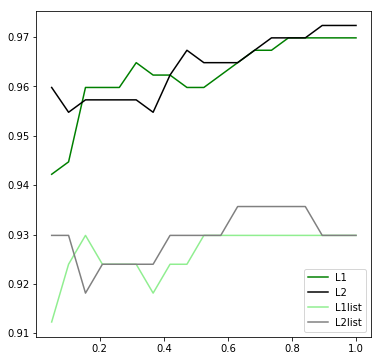

'\n随着C的逐渐变大，正则化的强度越来越小，模型在训练集和测试集上的表现都呈上升趋势，知道C=0.8左右，训练集上的表现\n仍然在走高，但模型在未知数据集上的表现开始下跌，这时候就是出现了过拟合，我们可以认为，C设定为0.8会比较好，在实\n际使用时，基本就默认使用l2正则化，如果感觉到模型的效果不好，那就换l1试试看\n'

In [10]:
'''究竟哪个正则化的效果更好，还是差不多？？？'''
l1 = []
l2 = []
l1list = []
l2list = []

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size = 0.3,random_state = 420)

for i in np.linspace(0.05,1,19):  #画C的学习曲线  取出19个数
    lrl1 = LogisticRegression(penalty='l1',solver='liblinear',C = i,max_iter=1000)
    lrl2 = LogisticRegression(penalty='l2',solver='liblinear',C = i,max_iter=1000)
    
    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain)) #保存训练的结果
    l1list.append(accuracy_score(lrl1.predict(Xtest),Ytest)) #保存测试的结果
    
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2list.append(accuracy_score(lrl2.predict(Xtest),Ytest))
    
    graph = [l1,l2,l1list,l2list]
    color = ['green','black','lightgreen','gray']
    label = ['L1','L2','L1list','L2list']
    
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) #图例显示 位置在4（右下角）
plt.show()
'''
随着C的逐渐变大，正则化的强度越来越小，模型在训练集和测试集上的表现都呈上升趋势，知道C=0.8左右，训练集上的表现
仍然在走高，但模型在未知数据集上的表现开始下跌，这时候就是出现了过拟合，我们可以认为，C设定为0.8会比较好，在实
际使用时，基本就默认使用l2正则化，如果感觉到模型的效果不好，那就换l1试试看
'''

###### 逻辑回归中的特征工程
1、业务选择

2、PCA和SVD一般不用

说到降维，我们首先想到的是之前提到的高效降维算法，PCA和SVD，遗憾的是，这两种方法大多数时候不适用于逻辑回归。逻辑回归是由线性回归演变而来，线性回归的一个核心目的是通过求解参数来探究特征X与标签y之间的关系，而逻辑回归也传承了这个性质，我们常常希望通过逻辑回归的结果，来判断什么样的特征与分类结果相关，因此我们希望保留特征的原貌。PCA和SVD的降维结果是不可解释的，因此一旦降维后，我们就无法解释特征和标签之间的关系了。当然，在不需要探究特征与标签之间关系的线性数据上，降维算法PCA和SVD也是可以使用的

3、统计方法可以使用，但不是非常必要

4、高效的嵌入法embedded

In [1]:
#高效的嵌入法embedded
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

data = load_breast_cancer()
print('data.shape:{}'.format(data.data.shape))

data.shape:(569, 30)


In [3]:
LR_ = LR(solver='liblinear',C = 0.9,random_state=420) #C是上面学习曲线获得的最佳值0.9
score = cross_val_score(LR_,data.data,data.target,cv=10).mean()
print('score:{}'.format(score))

X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)  
#对数据进行降维 norm_order=1 表示使用L1范式进行筛选
print('X_embedded.shape:{}'.format(X_embedded.shape))    #只剩下9个特征
'''X_embedded是降维后的数据'''

score_embedded = cross_val_score(LR_,X_embedded,data.target,cv=10).mean()
print('score_embedded:{}'.format(score_embedded))
'''看看结果，特征数量被减少到个位数，并且模型的效果却没有下降太多，如果我们要求不高，在这里其实就可以停下了，
但是有两种调整方法让模型效果拟合效果更好'''

score:0.9508998790078644
X_embedded.shape:(569, 9)
score_embedded:0.9368323826808401


'看看结果，特征数量被减少到个位数，并且模型的效果却没有下降太多，如果我们要求不高，在这里其实就可以停下了，\n但是有两种调整方法让模型效果拟合效果更好'

(0.0, 30)
(0.10897274787330495, 17)
(0.2179454957466099, 12)
(0.32691824361991484, 10)
(0.4358909914932198, 8)
(0.5448637393665248, 8)
(0.6538364872398297, 5)
(0.7628092351131347, 5)
(0.8717819829864396, 5)
(0.9807547308597445, 5)
(1.0897274787330495, 5)
(1.1987002266063544, 4)
(1.3076729744796594, 3)
(1.4166457223529643, 2)
(1.5256184702262694, 2)
(1.6345912180995743, 1)
(1.7435639659728792, 1)
(1.8525367138461841, 1)
(1.961509461719489, 1)
(2.070482209592794, 1)


D:\anaconda\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


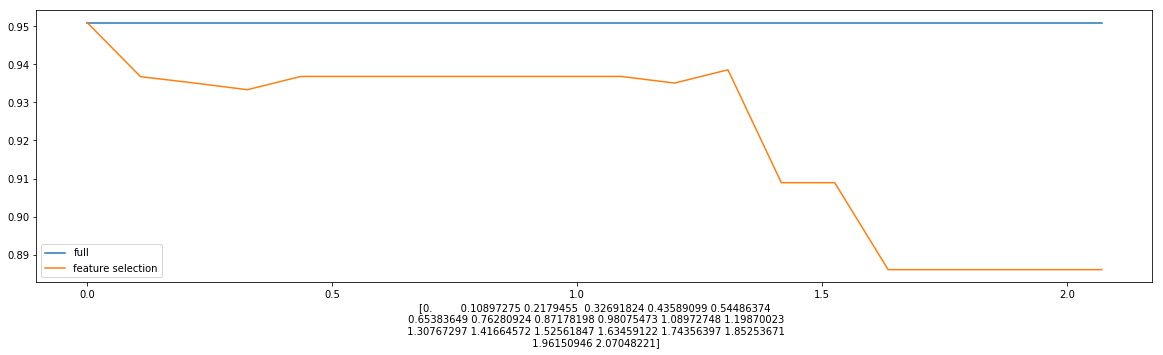

In [5]:
'''SelectFromModel中的参数threshold是一个浮点数，代表嵌入法的阈值，表示删除所有参数的绝对值低于这个阈值的特征'''
# 调节threshold来让模型拟合程度更好

fullx = []
fsx = []

threshold = np.linspace(0,abs((LR_.fit(data.data,data.target).coef_)).max(),20)
#从0到coef_绝对值的最大值均匀取20个 .coef_是各个特征的系数

k = 0
for i in threshold:
    X_embedded = SelectFromModel(LR_,threshold=i).fit_transform(data.data,data.target)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=5).mean()) #全部x的分数
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=5).mean()) #降维后的数据
    print((threshold[k],X_embedded.shape[1]))  #对应的shreshold降维后的特征矩阵的特征个数
    k += 1

plt.figure(figsize=(20,5))
plt.plot(threshold,fullx,label='full') #全部x
plt.plot(threshold,fsx,label='feature selection') #降维后的特征矩阵
plt.xlabel(threshold)
plt.legend() #图例
plt.show()

###### 第二种调整方法，是调整逻辑回归类LR_,通过画C的学习曲线来实现

0.9579222777991536 9.01


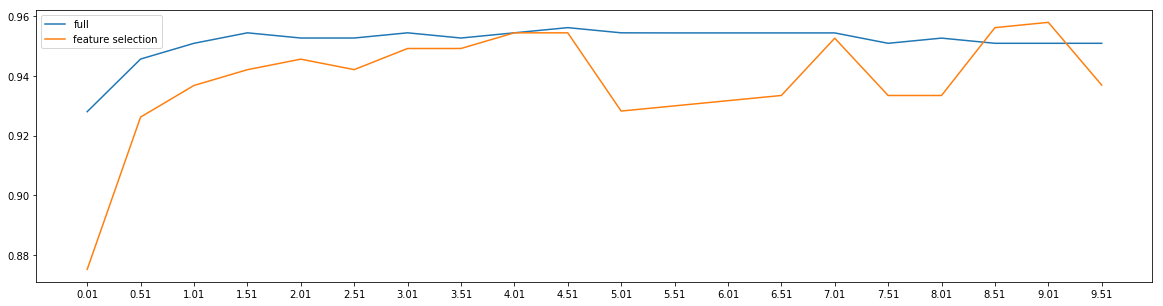

In [8]:
#还是使用L1范数来调整
fullx = []
fsx = []

C = np.arange(0.01,10.01,0.5) #每0.5取一个数

for i in C:
    LR_ = LR(solver='liblinear',C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=5).mean())
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target) #norm_order=1 L1范数
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=5).mean())
    
print(max(fsx),C[fsx.index(max(fsx))]) #最大的fsx和最大的fsx对应的C值

plt.figure(figsize=(20,5))
plt.plot(C,fullx,label = 'full')
plt.plot(C,fsx,label = 'feature selection')
plt.xticks(C)
plt.legend()
plt.show()

0.9580405755768732 6.069999999999999


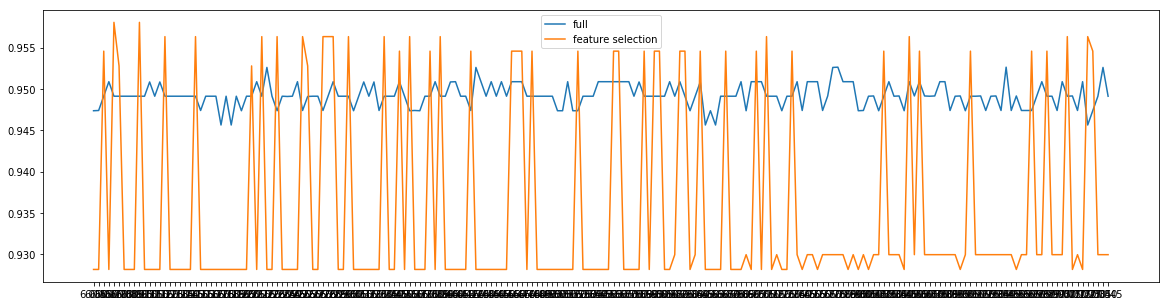

In [9]:
'''继续细化学习曲线'''
fullx = []
fsx = []

C=np.arange(6.05,7.05,0.005)

for i in C:
    LR_ = LR(solver='liblinear',C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())

print(max(fsx),C[fsx.index(max(fsx))])

plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

In [10]:
'''在C = 6.069999999999999的时候降维效果最好'''

#验证模型效果，降维之前
LR_ = LR(solver='liblinear',C = 6.069999999999999,random_state=420)
score1 = cross_val_score(LR_,data.data,data.target,cv=10).mean()
print('模型降维之前效果：{}'.format(score1))

#验证模型效果，降维之后
LR_ = LR(solver='liblinear',C = 6.069999999999999,random_state=420)
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
score2 = cross_val_score(LR_,X_embedded,data.target,cv=10).mean()
print('X_embedded.shape:{}'.format(X_embedded.shape))
print('模型降维之后效果：{}'.format(score2))

模型降维之前效果：0.9491152450090743
X_embedded.shape:(569, 11)
模型降维之后效果：0.9580405755768732


##### 比较麻烦的系数累加法
###### 系数累加法的原理非常简单。在PCA中，我们通过绘制累积可解释方差贡献率曲线来选择超参数，在逻辑回归中我们可以使用系数coef_来这样做，并且我们选择特征个数的逻辑也是类似的：找出曲线由锐利变平滑的转折点，转折点之前被累加的特征都是我们需要的，转折点之后的我们都不需要。不过这种方法相对比较麻烦，因为我们要先对特征系数进行从大到小的排序，还要确保我们知道排序后的每个系数对应的原始特征的位置，才能够正确找出那些重要的特征。如果要使用这样的方法，不如直接使用嵌入法来得方便。

#### 梯度下降 
在sklearn当中，我们设置参数max_iter最大迭代次数来代替步长，帮助我们控制模型的迭代速度并适时地让模型停下。

max_iter越大，代表步长越小，模型迭代时间越长，反之，则代表步长设置很大，模型迭代时间很短。

D:\anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


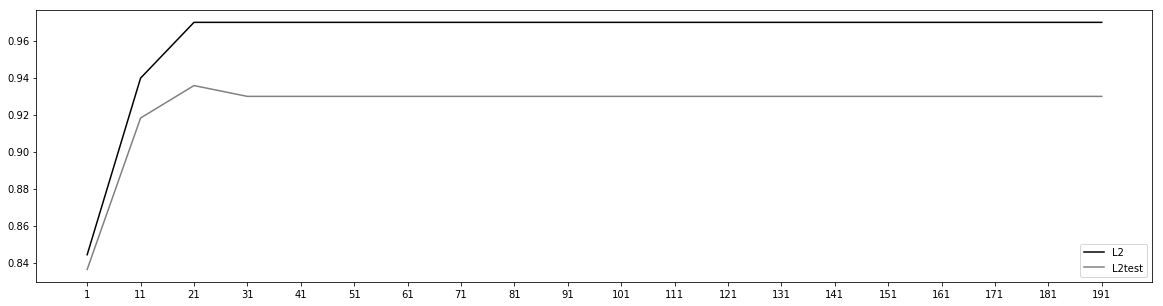

In [17]:
from sklearn.linear_model import LogisticRegression 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = load_breast_cancer()  #实例化
X = data.data
y = data.target

l2 = []
l2test = []

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

for i in np.arange(1,201,10):
    lrl2 = LR(penalty='l2',solver='liblinear',C=0.9,max_iter=i) #max_iter用来表示步长
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain)) #训练集的评分
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest)) #测试集的评分

graph = [l2,l2test]
color = ['black','gray']
label = ['L2','L2test']

plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()

In [16]:
# 我们可以使用属性.n_iter_来调节本次求解中真正实现的迭代次数
lr = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=300).fit(Xtrain,Ytrain)
lr.n_iter_

array([25], dtype=int32)

### 二元回归与多元回归：重要参数solver和multi_class
之前我们对逻辑回归的讨论，都是针对二分类的逻辑回归展开，其实sklearn提供了多种可以使用逻辑回归处理多分类问题的选

项。比如说，我们可以把某种分类类型都看作1，其余的分类类型都为0值，和”数据预处理“中的二值化的思维类似，这种方

法被称为"一对多"(One-vs-rest)，简称OvR，在sklearn中表示为“ovr"。又或者，我们可以把好几个分类类型划为1，剩下的

几个分类类型划为0值，这是一种”多对多“(Many-vs-Many)的方法，简称MvM，在sklearn中表示为"Multinominal"。每种方式

都配合L1或L2正则项来使用。在sklearn中，我们使用参数multi_class来告诉模型，我们的预测标签是什么样的类型。

multi_class输入"ovr", "multinomial", "auto"来告知模型，我们要处理的分类问题的类型。默认是"ovr"。'ovr':表示分类

问题是二分类，或让模型使用"一对多"的形式来处理多分类问题。'multinomial'：表示处理多分类问题，这种输入在参数

solver是'liblinear'时不可用。"auto"：表示会根据数据的分类情况和其他参数来确定模型要处理的分类问题的类型。比如

说，如果数据是二分类，或者solver的取值为"liblinear"，"auto"会默认选择"ovr"。反之，则会选择"nultinomial"。注意：

默认值将在0.22版本中从"ovr"更改为"auto"。

我们之前提到的梯度下降法，只是求解逻辑回归参数的一种方法，并且我们只讲解了求解二分类变量的参数时的各种原理。sklearn为我们提供了多种选择，让我们可以使用不同的求解器来计算逻辑回归。求解器的选择，由参数"solver"控制，共有五种选择。其中“liblinear”是二分类专用，也是现在的默认求解器。

![Title](1580140314(1).jpg)

In [20]:
#来看看鸢尾花数据集上，multinomial和ovr的区别怎么样：
from sklearn.datasets import load_iris
iris = load_iris()

#multinomial表示处理多分类问题 ovr表示分类问题是二分类或者让模型使用一对多的形式来处理多分类问题
for multi_class in ('multinomial','ovr'): 
    clf = LogisticRegression(solver='sag',max_iter=100,random_state=42,
                            multi_class=multi_class).fit(iris.data,iris.target)
    
#打印两种multi_class模式下的训练分数
#%的用法，用%来代替打印的字符串中，想由变量替换的部分。%.3f表示，保留三位小数的浮点数。%s表示，字符串。
#字符串后的%后使用元祖来容纳变量，字符串中有几个%，元祖中就需要有几个变量
    print("training score : %.3f (%s)" % (clf.score(iris.data, iris.target), multi_class))

training score : 0.987 (multinomial)
training score : 0.960 (ovr)


D:\anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


##### 样本不平衡与参数class_weight
样本不平衡是指在一组数据集中，标签的一类天生占有很大的比例，或误分类的代价很高，即我们想要捕捉出某种特定的分类的时候的状况。

什么情况下误分类的代价很高？例如，我们现在要对潜在犯罪者和普通人进行分类，如果没有能够识别出潜在犯罪者，那么这些人就可能去危害社会，造成犯罪，识别失败的代价会非常高，但如果，我们将普通人错误地识别成了潜在犯罪者，代价却相对较小。所以我们宁愿将普通人分类为潜在犯罪者后再人工甄别，但是却不愿将潜在犯罪者分类为普通人，有种"宁愿错杀不能放过"的感觉。

再比如说，在银行要判断“一个新客户是否会违约”，通常不违约的人vs违约的人会是99：1的比例，真正违约的人其实是非常少的。这种分类状况下，即便模型什么也不做，全把所有人都当成不会违约的人，正确率也能有99%，这使得模型评估指标变得毫无意义，根本无法达到我们的“要识别出会违约的人”的建模目的。

因此我们要使用参数class_weight对样本标签进行一定的均衡，给少量的标签更多的权重，让模型更偏向少数类，向捕获少数类的方向建模。该参数默认None，此模式表示自动给与数据集中的所有标签相同的权重，即自动1：1。当误分类的代价很高的时候，我们使用”balanced“模式，我们只是希望对标签进行均衡的时候，什么都不填就可以解决样本不均衡问题。

但是，sklearn当中的参数class_weight变幻莫测，大家用模型跑一跑就会发现，我们很难去找出这个参数引导的模型趋势，或者画出学习曲线来评估参数的效果，因此可以说是非常难用。我们有着处理样本不均衡的各种方法，其中主流的是采样法，是通过重复样本的方式来平衡标签，可以进行上采样（增加少数类的样本），比如SMOTE，或者下采样（减少多数类的样本）。对于逻辑回归来说，上采样是最好的办法。在案例中，会给大家详细来讲如何在逻辑回归中使用上采样